In [1]:
import os
import math
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
import math
from sklearn.linear_model import SGDClassifier
# from sklearn.bdt import SVC
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
import xgboost as xgb

c:\Users\Me\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hinge_sgd_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
bdt_clf = XGBClassifier(random_state=42)
bdt_clfw = XGBClassifier(random_state=42)

In [2]:
X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir="topocluster_test_Z_EN_test", format_mode="topocluster_ET_boundaries",distance_boundaries=[0.05,0.1,0.2,0.3,0.4])

preprepared data in ..\data\topocluster_test_Z_EN_test is missing, preparing and saving here
attempting to generate topo training data


100%|██████████| 21701/21701 [00:10<00:00, 2067.75it/s]


In [15]:

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    print(distance_boundaries)
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    
    bdt_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="svm")
    sample_weights = compute_sample_weight("balanced", y_train)
    svm_clfw.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred_w = svm_clfw.predict(X_test)
    evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="svm w")
    
    

found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
[0.1, 0.2, 0.3, 0.4]
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
Evaluation of svm
Accuracy: 0.96684627
Recall: 0.99603185
Precision: 0.96969657
F1 Score: 0.98268780
Confusion Matrix:
 [[ 2038  2314]
 [  295 74047]]
Evaluation of svm w
Accuracy: 0.92493710
Recall: 0.93399424
Precision: 0.98580251
F1 Score: 0.95919932
Confusion Matrix:
 [[ 3352  1000]
 [ 4907 69435]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
Evaluation of svm
Accuracy: 0.97266628
Recall: 0.99760566
Precision: 0.97408619
F1 Score: 0.98570565
Confusion Matrix:
 [[ 2379  1973]
 [  178 74164]]
Evaluation of svm w
A

found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
[0.1, 0.2, 0.3, 0.4]
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_0050101504
[0.05, 0.1, 0.15, 0.4]
Evaluation of hinge
Accuracy: 0.95950136
Recall: 0.97944634
Precision: 0.97772347
F1 Score: 0.97858415
Confusion Matrix:
 [[ 2693  1659]
 [ 1528 72814]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_001250025005010204
[0.0125, 0.025, 0.05, 0.1, 0.2, 0.4]
Evaluation of hinge
Accuracy: 0.96272905
Recall: 0.98422157
Precision: 0.97651110
F1 Score: 0.98035117
Confusio

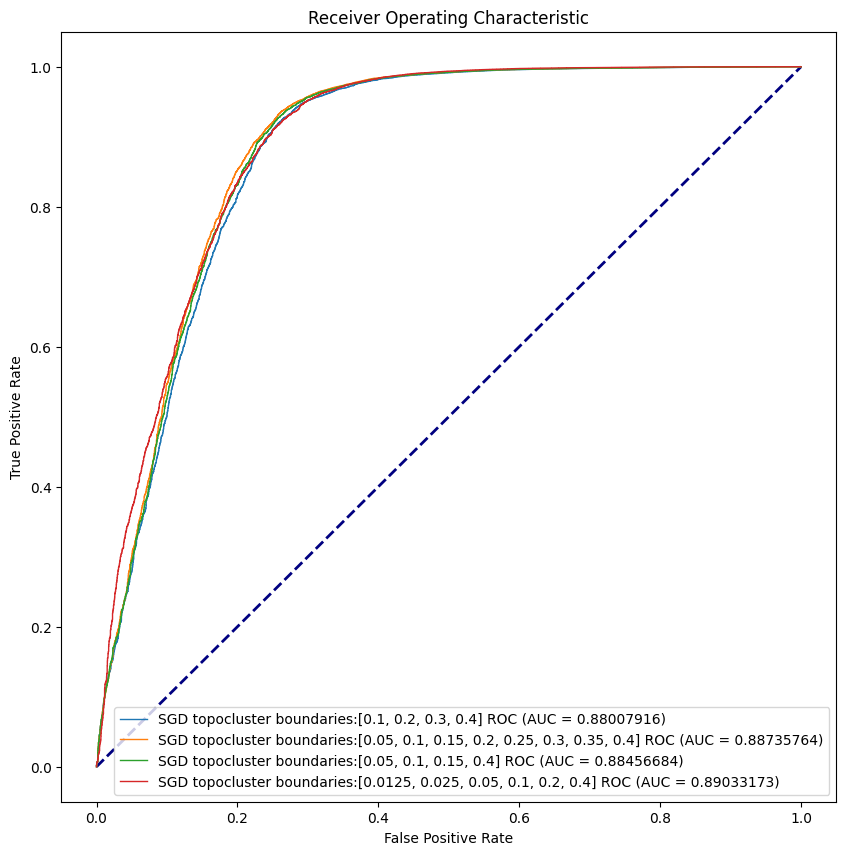

In [7]:
distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    print(distance_boundaries)
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    fpr, tpr, roc_auc = compute_roc(hinge_sgd_clf,X_test,y_test)
    plt.plot(fpr, tpr, lw=1, label="SGD topocluster boundaries:"+f"{distance_boundaries} ROC (AUC = {roc_auc:.8f})")
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("multi_roc_topo_boundary_test_SGD", dpi=400, bbox_inches='tight')
plt.show()
        


[0.1, 0.2, 0.3, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
training & predicting BDT
Evaluation of bdt
Accuracy: 0.96772308
Recall: 0.99343574
Precision: 0.97296656
F1 Score: 0.98309462
Confusion Matrix:
 [[ 2300  2052]
 [  488 73854]]
training & predicting weighted BDT
Evaluation of bdt w
Accuracy: 0.90884947
Recall: 0.91605015
Precision: 0.98649921
F1 Score: 0.94997036
Confusion Matrix:
 [[ 3420   932]
 [ 6241 68101]]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
training & predicting BDT
Evaluation of bdt
Acc

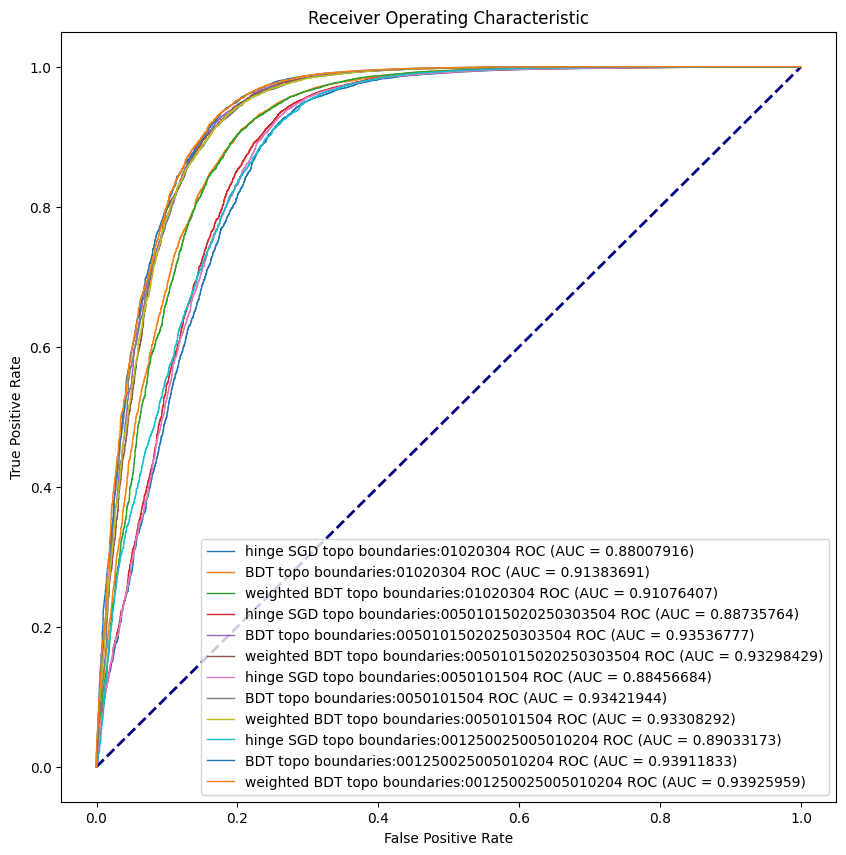

In [4]:
classifiers = {}
X_tests = []
y_tests = []

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    print(distance_boundaries)

    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    
    X_tests.append(X_test)
    y_tests.append(y_test)
    print("training & predicting hinge SGD")
    classifiers["hinge SGD topo boundaries:"+f"{extension}"] = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
    classifiers["hinge SGD topo boundaries:"+f"{extension}"].fit(X_train, y_train)
    y_pred_hinge = classifiers["hinge SGD topo boundaries:"+f"{extension}"].predict(X_test)
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    
    X_tests.append(X_test)
    y_tests.append(y_test)
    print("training & predicting BDT")
    classifiers["BDT topo boundaries:"+f"{extension}"] = XGBClassifier(random_state=42)
    classifiers["BDT topo boundaries:"+f"{extension}"].fit(X_train, y_train)
    y_pred = classifiers["BDT topo boundaries:"+f"{extension}"].predict(X_test)
    evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="bdt")

    X_tests.append(X_test)
    y_tests.append(y_test)
    print("training & predicting weighted BDT")
    classifiers["weighted BDT topo boundaries:"+f"{extension}"] = XGBClassifier(random_state=42)
    sample_weights = compute_sample_weight("balanced", y_train)
    classifiers["weighted BDT topo boundaries:"+f"{extension}"].fit(X_train, y_train, sample_weight=sample_weights)
    y_pred_w = classifiers["weighted BDT topo boundaries:"+f"{extension}"].predict(X_test)
    evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="bdt w")

multi_roc_multi_data_single_plot(classifiers,X_tests,y_tests,"multi_roc_SGD_BDT_weighted_topocluster_boundary_comparison")

[0.1, 0.2, 0.3, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
ACC: 0.96078481
training & predicting BDT
Evaluation of bdt
Accuracy: 0.96772308
Recall: 0.99343574
Precision: 0.97296656
F1 Score: 0.98309462
Confusion Matrix:
 [[ 2300  2052]
 [  488 73854]]
ACC: 0.96772308
training & predicting weighted BDT
Evaluation of bdt w
Accuracy: 0.90884947
Recall: 0.91605015
Precision: 0.98649921
F1 Score: 0.94997036
Confusion Matrix:
 [[ 3420   932]
 [ 6241 68101]]
ACC: 0.90884947
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]

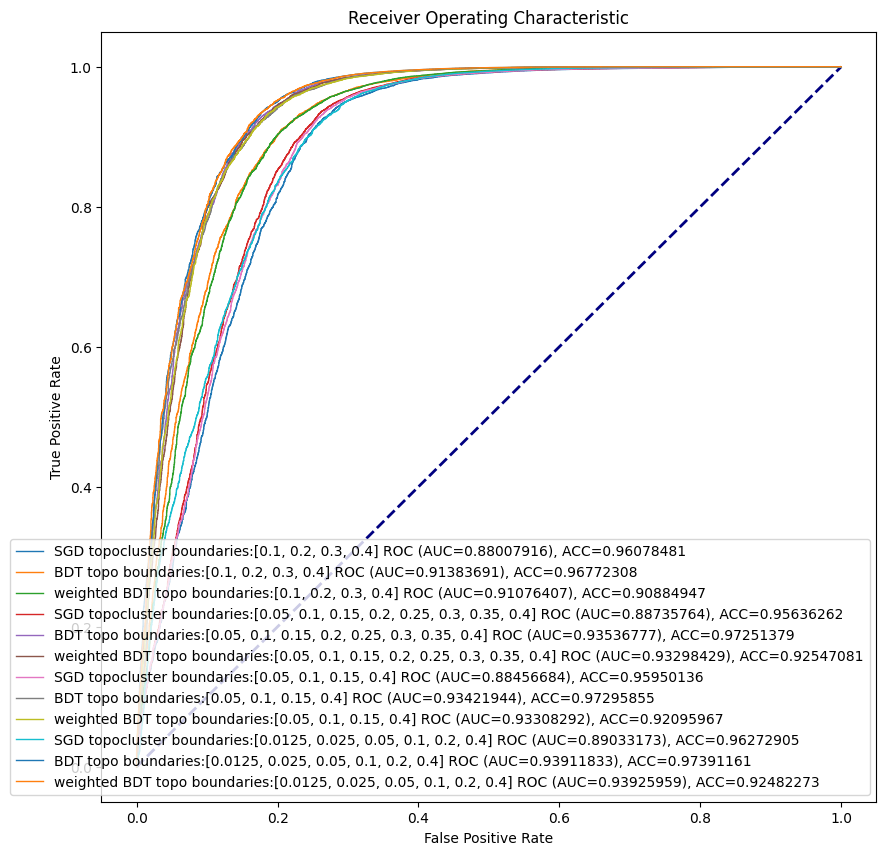

In [5]:
classifiers = {}
X_tests = []
y_tests = []
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    print(distance_boundaries)

    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    X_tests.append(X_test)
    y_tests.append(y_test)
    X_tests.append(X_test)
    y_tests.append(y_test)
    X_tests.append(X_test)
    y_tests.append(y_test)

    print("training & predicting hinge SGD")
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    classifiers["hinge SGD topo boundaries:"+f"{extension}"] = hinge_sgd_clf
    fpr, tpr, roc_auc = compute_roc(hinge_sgd_clf,X_test,y_test)
    accuracy = evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    print("ACC:",accuracy)
    plt.plot(fpr, tpr, lw=1, label="SGD topocluster boundaries:"+f"{distance_boundaries} ROC (AUC={roc_auc:.8f}), ACC={accuracy}")
    
    
    print("training & predicting BDT")
    bdt_clf.fit(X_train, y_train)
    y_pred = bdt_clf.predict(X_test)
    classifiers["BDT topo boundaries:"+f"{extension}"] = bdt_clf
    fpr, tpr, roc_auc = compute_roc(bdt_clf,X_test,y_test)
    accuracy = evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="bdt")
    print("ACC:",accuracy)

    plt.plot(fpr, tpr, lw=1, label="BDT topo boundaries:"+f"{distance_boundaries} ROC (AUC={roc_auc:.8f}), ACC={accuracy}")
    

    print("training & predicting weighted BDT")
    sample_weights = compute_sample_weight("balanced", y_train)
    bdt_clfw.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred_w = bdt_clfw.predict(X_test)
    classifiers["weighted rbf BDT topo boundaries:"+f"{extension}"] = bdt_clfw
    fpr, tpr, roc_auc = compute_roc(bdt_clfw,X_test,y_test)
    accuracy = evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="bdt w")
    print("ACC:",accuracy)

    plt.plot(fpr, tpr, lw=1, label="weighted BDT topo boundaries:"+f"{distance_boundaries} ROC (AUC={roc_auc:.8f}), ACC={accuracy}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("multi_roc_topo_boundary_test_SGD", dpi=400, bbox_inches='tight')
plt.show()



[0.1, 0.2, 0.3, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
training & predicting BDT
Evaluation of bdt
Accuracy: 0.96772308
Recall: 0.99343574
Precision: 0.97296656
F1 Score: 0.98309462
Confusion Matrix:
 [[ 2300  2052]
 [  488 73854]]
ACC: 0.96772308
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
training & predicting BDT
Evaluation of bdt
Accuracy: 0.97251379
Recall: 0.99382583
Precision: 0.97745644
F1 Score: 0.98557317
Confusion Matrix:
 [[ 2648  1704]
 [  459 73883]]
ACC: 0.97251379
[0.05, 0.1, 0.15, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_0050101504
training & predicting BDT
Evaluation of bdt
Accuracy: 0.97295855
Recall: 0.99452530
Precision: 0.97725230
F1 Score: 0.98581314
Confusion Matrix:
 [[ 2631  1721]
 [  407 73935]]
ACC: 0.97295855
[0.0125, 0.025, 0.05, 0.1, 0.2, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_0012500250

100%|██████████| 21701/21701 [00:17<00:00, 1262.68it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.97393702
Recall: 0.99459256
Precision: 0.97818466
F1 Score: 0.98632037
Confusion Matrix:
 [[ 2703  1649]
 [  402 73940]]
ACC: 0.97393702
[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_0006250012500250050104 is missing, preparing and saving here
attempting to generate topo training data


100%|██████████| 21701/21701 [00:17<00:00, 1262.92it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.97252650
Recall: 0.99459256
Precision: 0.97675033
F1 Score: 0.98559070
Confusion Matrix:
 [[ 2592  1760]
 [  402 73940]]
ACC: 0.97252650
[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.15, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_0006250012500250050101504 is missing, preparing and saving here
attempting to generate topo training data


100%|██████████| 21701/21701 [00:17<00:00, 1255.98it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.97363204
Recall: 0.99440424
Precision: 0.97805120
F1 Score: 0.98615993
Confusion Matrix:
 [[ 2693  1659]
 [  416 73926]]
ACC: 0.97363204


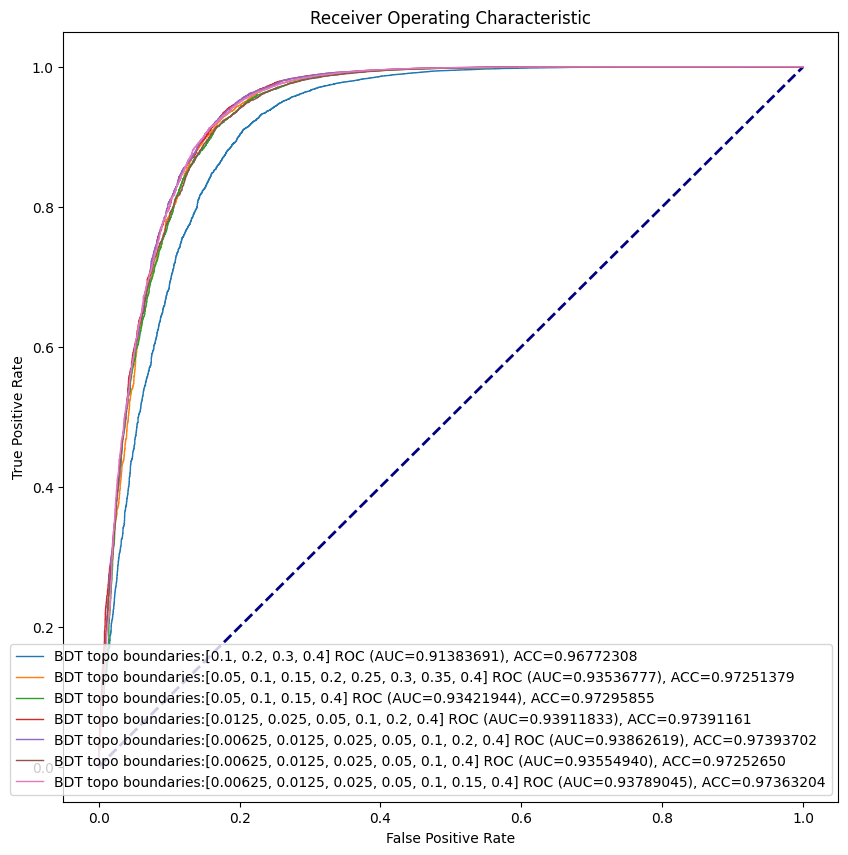

In [6]:
classifiers = {}
X_tests = []
y_tests = []
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.2,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.15,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    print(distance_boundaries)

    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    X_tests.append(X_test)
    y_tests.append(y_test)

    
    print("training & predicting BDT")
    bdt_clf.fit(X_train, y_train)
    y_pred = bdt_clf.predict(X_test)
    classifiers["BDT topo boundaries:"+f"{extension}"] = bdt_clf
    fpr, tpr, roc_auc = compute_roc(bdt_clf,X_test,y_test)
    accuracy = evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="bdt")
    print("ACC:",accuracy)

    plt.plot(fpr, tpr, lw=1, label="BDT topo boundaries:"+f"{distance_boundaries} ROC (AUC={roc_auc:.8f}), ACC={accuracy}")
    


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("multi_roc_topo_boundary_test_SGD", dpi=400, bbox_inches='tight')
plt.show()



[0.1, 0.2, 0.3, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_01020304_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:19<00:00, 1113.04it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.84563990
Recall: 0.89724138
Precision: 0.81380317
F1 Score: 0.85348786
Confusion Matrix:
 [[3438  893]
 [ 447 3903]]
ACC: 0.84563990
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:18<00:00, 1147.97it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.87201935
Recall: 0.91379310
Precision: 0.84376990
F1 Score: 0.87738660
Confusion Matrix:
 [[3595  736]
 [ 375 3975]]
ACC: 0.87201935
[0.05, 0.1, 0.15, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_0050101504_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:18<00:00, 1159.14it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.86821795
Recall: 0.91862069
Precision: 0.83493523
F1 Score: 0.87478109
Confusion Matrix:
 [[3541  790]
 [ 354 3996]]
ACC: 0.86821795
[0.0125, 0.025, 0.05, 0.1, 0.2, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_001250025005010204_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:18<00:00, 1144.73it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.87248013
Recall: 0.91241379
Precision: 0.84536741
F1 Score: 0.87761194
Confusion Matrix:
 [[3605  726]
 [ 381 3969]]
ACC: 0.87248013
[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_000625001250025005010204_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:18<00:00, 1163.67it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.87259532
Recall: 0.91448276
Precision: 0.84422750
F1 Score: 0.87795189
Confusion Matrix:
 [[3597  734]
 [ 372 3978]]
ACC: 0.87259532
[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_0006250012500250050104_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:19<00:00, 1106.99it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.86821795
Recall: 0.91678161
Precision: 0.83605870
F1 Score: 0.87456140
Confusion Matrix:
 [[3549  782]
 [ 362 3988]]
ACC: 0.86821795
[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.15, 0.4]
preprepared data in ..\data\topocluster_test_Z_EN_test_0006250012500250050101504_equalised is missing, preparing and saving here
Equalised: (21701, 26) (21701, 27)
attempting to generate topo training data


100%|██████████| 21701/21701 [00:18<00:00, 1148.94it/s]


training & predicting BDT
Evaluation of bdt
Accuracy: 0.87017625
Recall: 0.91540230
Precision: 0.83990719
F1 Score: 0.87603124
Confusion Matrix:
 [[3572  759]
 [ 368 3982]]
ACC: 0.87017625


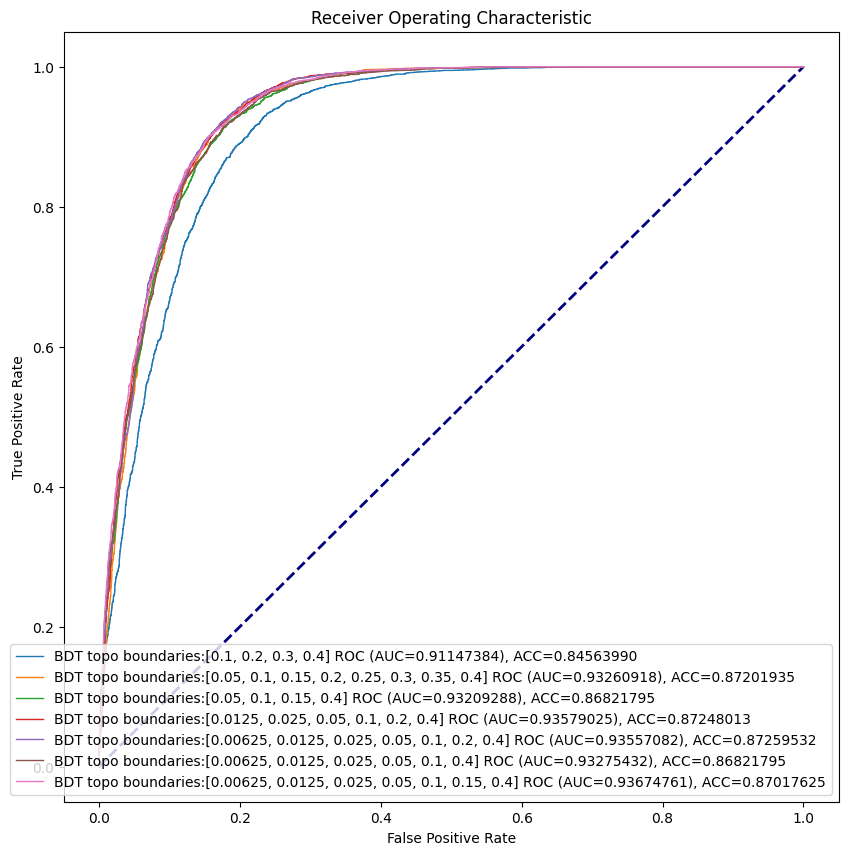

In [3]:
classifiers = {}
X_tests = []
y_tests = []
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.2,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.4],
                             [0.00625,0.0125,0.025,0.05,0.1,0.15,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    print(distance_boundaries)

    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries,equalised=True)
    X_tests.append(X_test)
    y_tests.append(y_test)

    
    print("training & predicting BDT")
    bdt_clf.fit(X_train, y_train)
    y_pred = bdt_clf.predict(X_test)
    classifiers["BDT topo boundaries:"+f"{extension}"] = bdt_clf
    fpr, tpr, roc_auc = compute_roc(bdt_clf,X_test,y_test)
    accuracy = evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="bdt")
    print("ACC:",accuracy)

    plt.plot(fpr, tpr, lw=1, label="BDT topo boundaries:"+f"{distance_boundaries} ROC (AUC={roc_auc:.8f}), ACC={accuracy}")
    


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("multi_roc_topo_boundary_test_SGD", dpi=400, bbox_inches='tight')
plt.show()